#Assignment - 1 - PS 19
#NLP Group 60
## APARNA, G. (2022ac05609)
## ROJA RANI CHALLA (2022ac05375)
## PRAKASH PRASAD (2022ac05256)
## AMIT KUMAR SRIVASTAVA (2022ac05292)

1. Preprocess the dataset to convert it into a format that the algorithm
can work with.
  1. Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.               (1M)
  2. Perform normalization by using Stemming or Lemmatization.  (1M)

2. Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.                                                             (3Marks)
3. Identify the top N most common POS tags in the dataset, where N is a user-specified parameter.    (1Mark)
4. Display the frequency count and percentage of each POS tag in the top N list.
(1Mark)
5. Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies                                 (1 Mark)
6. Display the HMM POS tagging on the first 4 rows of the dataset. (2 Marks)

Justification of the output obtained for all the above tasks is mandatory



#####Dataset https://drive.google.com/file/d/1bX24fa7ZA-3TIR05mntG1I-CPpmeZm5y/view?usp=sharing



In [35]:
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.tag import hmm

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import HiddenMarkovModelTagger

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
# Panda is used for reading the CSV file, the CSV file is converted into dataframe, reflected as df
# shape of the dataframe is 5 variable in 1048309 lines
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_Assignment01/Coursera_reviews.csv')
df = df.dropna(subset=['reviews'])
print(df.shape)
#print(df1.head(5))
#df = df1.dropna(subset=['reviews']).iloc[0:100].copy()
#print(df1.shape)
df.head(5)

(1048309, 5)


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training


In [19]:
# 1.1 Pre-processing Steps: Lowercase text, Removing Whitespace, Removing Numbers, Removing Special Characters, Removing Punctuations, Removing Stop Words.
# developed function for pre-processing the text for all the above.

def preprocess_text(text):
    # Remove punctuations
    try:
        text = text.translate(str.maketrans('', '', string.punctuation))
    except:
        text = ['majorissue']
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])

    # Remove special characters with space
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase and tokenize and remove stopwords
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)  # rejoin to make a string

In [20]:
# 1.1 Pre-processing Steps: Lowercase text, Removing Whitespace, Removing Numbers, Removing Special Characters, Removing Punctuations, Removing Emails, Removing Stop Words.
# applying the function on dataframe coloumb 'reviews' and create new coloumb 'preprocessed_reviews'
df['preprocessed_reviews'] = df['reviews'].apply(preprocess_text)
df.head()

,reviews,reviewers,date_reviews,rating,course_id,preprocessed_reviews
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training,pretty dry able pass two complete watches im h...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training,would better experience video screen shots wou...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training,information perfect program little annoying wa...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training,grammatical mistakes test made double take bad
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training,excellent course training provided detailed ea...


In [22]:
#  1.2. Perform normalization by using Stemming or Lemmatization.
# Lemmatization is used as its aims to do things properly by using vocabulary and morphological analysis
# to return the base form of a word while stemming is a more heuristic and crude process that chops off
# the ends of words.

lm = WordNetLemmatizer()

def apply_lemmetizer(text):
    words = word_tokenize(text)  # tokenising given string
    lemmatised_words = [lm.lemmatize(word) for word in words]
    return ' '.join(lemmatised_words)  # rejoin to make a string

df['lemmatised_reviews'] = df['preprocessed_reviews'].apply(apply_lemmetizer)
df.head()

,reviews,reviewers,date_reviews,rating,course_id,preprocessed_reviews,lemmatised_reviews
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training,pretty dry able pass two complete watches im h...,pretty dry able pas two complete watch im happ...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training,would better experience video screen shots wou...,would better experience video screen shot woul...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training,information perfect program little annoying wa...,information perfect program little annoying wa...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training,grammatical mistakes test made double take bad,grammatical mistake test made double take bad
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training,excellent course training provided detailed ea...,excellent course training provided detailed ea...


In [23]:
# 2. Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.
# pretrain POS tagger is used
def pos_tagging(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return tags

df['pos_tags'] = df['lemmatised_reviews'].apply(pos_tagging)
df.head()

,reviews,reviewers,date_reviews,rating,course_id,preprocessed_reviews,lemmatised_reviews,pos_tags
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training,pretty dry able pass two complete watches im h...,pretty dry able pas two complete watch im happ...,"[(pretty, RB), (dry, JJ), (able, JJ), (pas, NN..."
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training,would better experience video screen shots wou...,would better experience video screen shot woul...,"[(would, MD), (better, VB), (experience, NN), ..."
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training,information perfect program little annoying wa...,information perfect program little annoying wa...,"[(information, NN), (perfect, JJ), (program, N..."
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training,grammatical mistakes test made double take bad,grammatical mistake test made double take bad,"[(grammatical, JJ), (mistake, NN), (test, NN),..."
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training,excellent course training provided detailed ea...,excellent course training provided detailed ea...,"[(excellent, JJ), (course, NN), (training, NN)..."


In [24]:
hardcoded_pos_def = {'CC': 'conjunction, coordinating',
                     'CD': 'numeral, cardinal',
                     'DT': 'determiner',
                     'EX': 'existential there',
                     'FW': 'foreign word',
                     'IN': 'preposition or conjunction, subordinating',
                     'JJ': 'adjective or numeral, ordinal',
                     'JJR': 'adjective, comparative',
                     'JJS': 'adjective, superlative',
                     'LS': 'list item marker',
                     'MD': 'modal auxiliary',
                     'NN': 'noun, common, singular or mass',
                     'NNP': 'noun, proper, singular',
                     'NNPS': 'noun, proper, plural',
                     'NNS': 'noun, common, plural',
                     'PDT': 'pre-determiner',
                     'POS': 'genitive marker',
                     'PRP': 'pronoun, personal',
                     'PRP$': 'pronoun, possessive',
                     'RB': 'adverb',
                     'RBR': 'adverb, comparative',
                     'RBS': 'adverb, superlative',
                     'RP': 'particle',
                     'SYM': 'symbol',
                     'TO': '"to" as preposition or infinitive marker',
                     'UH': 'interjection',
                     'VB': 'verb, base form',
                     'VBD': 'verb, past tense',
                     'VBG': 'verb, present participle or gerund',
                     'VBN': 'verb, past participle',
                     'VBP': 'verb, present tense, not 3rd person singular',
                     'VBZ': 'verb, present tense, 3rd person singular',
                     'WDT': 'WH-determiner',
                     'WP': 'WH-pronoun',
                     'WP$': 'WH-pronoun, possessive',
                     'WRB': 'Wh-adverb'}

In [1]:
# 3. Identify the top N most common POS tags in the dataset, where N is a user-specified parameter.
count_dict = defaultdict(lambda: 0)
for row in df['pos_tags']:
    for _, key in row:
        count_dict[key] += 1

counts_dict_final = dict(count_dict)
counts_dict_df_ = pd.DataFrame(list(counts_dict_final.items()), columns=['pos_tags', 'occurrence_counts'])
pos_def_df = pd.DataFrame(list(hardcoded_pos_def.items()), columns=['pos_tags', 'tag_definition'])

counts_dict_df = pd.merge(counts_dict_df_, pos_def_df, on='pos_tags', how='left')

N_max = counts_dict_df.shape[0]
print('Total pos tags in data : {}'.format(N_max))

NameError: name 'defaultdict' is not defined

In [46]:
# 3. Identify the top N most common POS tags in the dataset, where N is a user-specified parameter.

N = int(input("Enter N for looking at top n pos tags, max N {}: ".format(N_max)))
assert N<=N_max, 'Enter valid N <= N_max'

counts_dict_df = counts_dict_df[['pos_tags', 'tag_definition', 'occurrence_counts']]
counts_dict_df = counts_dict_df.sort_values(by='occurrence_counts', ascending=False)
counts_dict_df.head(N)

Enter N for looking at top n pos tags, max N 37: 5


,pos_tags,tag_definition,occurrence_counts
2,NN,"noun, common, singular or mass",5768565
1,JJ,"adjective or numeral, ordinal",2863466
0,RB,adverb,842274
4,VBG,"verb, present participle or gerund",585732
6,VBD,"verb, past tense",424660


In [47]:
# 4. Display the frequency count and percentage of each POS tag in the top N list.

top_n_pos_tags_df = counts_dict_df.nlargest(N, 'occurrence_counts')
counts_ = counts_dict_df['occurrence_counts'].sum()
top_n_pos_tags_df['percent_coverage'] = (top_n_pos_tags_df['occurrence_counts'] / counts_) * 100
top_n_pos_tags_df.head()

,pos_tags,tag_definition,occurrence_counts,percent_coverage
2,NN,"noun, common, singular or mass",5768565,45.779660
1,JJ,"adjective or numeral, ordinal",2863466,22.724629
0,RB,adverb,842274,6.684334
4,VBG,"verb, present participle or gerund",585732,4.648403
6,VBD,"verb, past tense",424660,3.370126


Text(0.5, 1.0, 'Pos tags frequency counts')

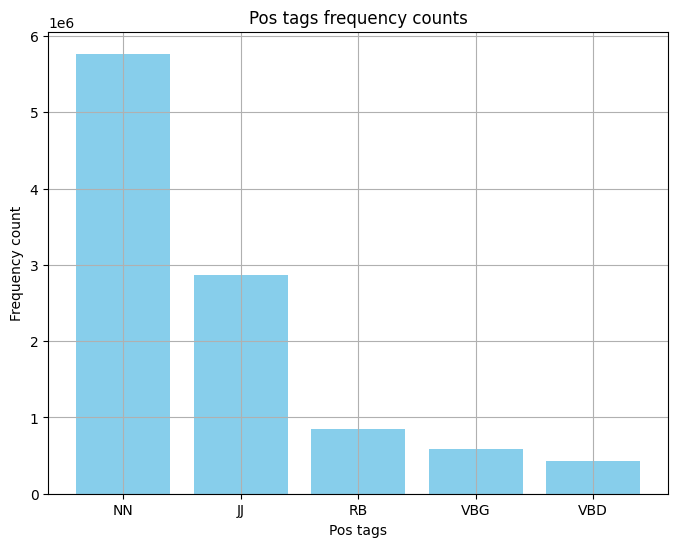

In [48]:
# 5. Generate visualizations such as bar charts, word clouds to represent the POS tag frequencies

plt.figure(figsize=(8, 6))
plt.bar(top_n_pos_tags_df['pos_tags'], top_n_pos_tags_df['occurrence_counts'], color='skyblue')

plt.xlabel('Pos tags')
plt.ylabel('Frequency count')
plt.grid()
plt.title('Pos tags frequency counts')


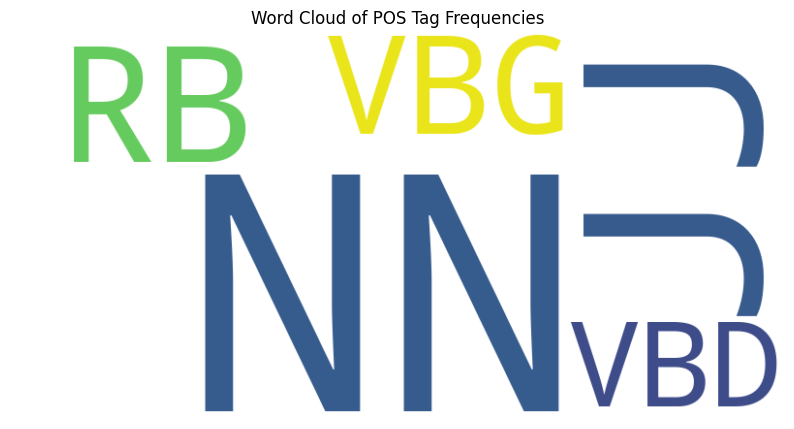

In [49]:
# Generate a word cloud for POS tag frequencies
top_pos_tags = zip(top_n_pos_tags_df['pos_tags'], top_n_pos_tags_df['occurrence_counts'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_pos_tags))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of POS Tag Frequencies')
plt.show()

In [33]:
# 6. Display the HMM POS tagging on the first 4 rows of the dataset.
# we will test on first 4 rows and train on the rest
train_data = df.iloc[4:]['pos_tags']
test_data = df.iloc[:4]['lemmatised_reviews']

train_data.shape, test_data.shape

((1048305,), (4,))

In [36]:
# training hmm model
hmm_tagger = HiddenMarkovModelTagger.train(list(train_data))
#predictions
tagged_token_list = []
for tokens_ in list(test_data):
    index = len(tagged_token_list)
    print('for index {} , HMM o/p: '.format(index))
    tokens = word_tokenize(tokens_)
    tagged_tokens = hmm_tagger.tag(tokens)
    tagged_token_list.append(tagged_tokens)
    print(tagged_tokens)
    print('nltk pretrained model o/p')
    print(df.iloc[index]['pos_tags'])
    print('\n')

# tagged_tokens = hmm_tagger.tag(list(test_data))
#
# print(*tagged_tokens, sep='\n')

for index 0 , HMM o/p: 
[('pretty', 'RB'), ('dry', 'JJ'), ('able', 'JJ'), ('pas', 'NN'), ('two', 'CD'), ('complete', 'JJ'), ('watch', 'NN'), ('im', 'NN'), ('happy', 'JJ'), ('usual', 'JJ'), ('question', 'NN'), ('final', 'JJ'), ('exam', 'NN'), ('course', 'NN'), ('annoying', 'VBG'), ('far', 'RB'), ('better', 'RBR'), ('many', 'JJ'), ('microsoft', 'JJ'), ('test', 'NN'), ('taken', 'VBN'), ('never', 'RB'), ('found', 'VBN'), ('suplimental', 'DT'), ('material', 'NN'), ('course', 'NN'), ('reference', 'NN'), ('care', 'NN'), ('passed', 'VBD')]
nltk pretrained model o/p
[('pretty', 'RB'), ('dry', 'JJ'), ('able', 'JJ'), ('pas', 'NN'), ('two', 'CD'), ('complete', 'JJ'), ('watch', 'NN'), ('im', 'NN'), ('happy', 'JJ'), ('usual', 'JJ'), ('question', 'NN'), ('final', 'JJ'), ('exam', 'NN'), ('course', 'NN'), ('annoying', 'VBG'), ('far', 'RB'), ('better', 'RB'), ('many', 'JJ'), ('microsoft', 'JJ'), ('test', 'NN'), ('taken', 'VBN'), ('never', 'RB'), ('found', 'VBN'), ('suplimental', 'JJ'), ('material', 'NN'

In [37]:
print('printing tag description instead ')
for index, i in enumerate(tagged_token_list):
    print('for index {} , review: '.format(index))
    print(df.iloc[index]['reviews'])
    print('------------------------------------------------------------------------------------------')
    print(' HMM o/p: ')
    list1 = [(j[0], hardcoded_pos_def[j[1]].split(' ')[0])  for j in i]
    print(list1)
    print('------------------------------------------------------------------------------------------')
    print('nltk pretrained model o/p')
    list2 = [(j[0], hardcoded_pos_def[j[1]].split(' ')[0])  for j in df.iloc[index]['pos_tags']]
    print(list2)
    print('\n')

printing tag description instead 
for index 0 , review: 
Pretty dry, but I was able to pass with just two complete watches so I'm happy about that.  As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken.  Never found the suplimental material that the course references... but who cares... i passed!
------------------------------------------------------------------------------------------
 HMM o/p: 
[('pretty', 'adverb'), ('dry', 'adjective'), ('able', 'adjective'), ('pas', 'noun,'), ('two', 'numeral,'), ('complete', 'adjective'), ('watch', 'noun,'), ('im', 'noun,'), ('happy', 'adjective'), ('usual', 'adjective'), ('question', 'noun,'), ('final', 'adjective'), ('exam', 'noun,'), ('course', 'noun,'), ('annoying', 'verb,'), ('far', 'adverb'), ('better', 'adverb,'), ('many', 'adjective'), ('microsoft', 'adjective'), ('test', 'noun,'), ('taken', 'verb,'), ('never', 'adverb'), ('found', 'v

#Conclusion
The results are run inline and same is also printed as pdf

In [45]:
#END